In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_all.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_all.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_all.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_all.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 42), (4499, 1), (4233, 43), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:43]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 42, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,42,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21, 128)        5

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21, 128)        5

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 42, 1), (4233, 1, 42, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 


num_epochs = 120
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_all = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
71/71 [==============================] - 15s 155ms/step - loss: 1.4224 - accuracy: 0.5470 - val_loss: 2.1967 - val_accuracy: 0.1271

Epoch 00001: val_loss improved from inf to 2.19669, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/120
71/71 [==============================] - 10s 141ms/step - loss: 0.6660 - accuracy: 0.7751 - val_loss: 2.5223 - val_accuracy: 0.1491

Epoch 00002: val_loss did not improve from 2.19669
Epoch 3/120
71/71 [==============================] - 10s 148ms/step - loss: 0.4930 - accuracy: 0.8393 - val_loss: 2.9863 - val_accuracy: 0.1391

Epoch 00003: val_loss did not improve from 2.19669
Epoch 4/120
71/71 [==============================] - 10s 148ms/step - loss: 0.3842 - accuracy: 0.8655 - val_loss: 2.8708 - val_accuracy: 0.2247

Epoch 00004: val_loss did not improve from 2.19669
Epoch 5/120
71/71 [==============================] - 10s 136ms/step - loss: 0.2821 - accuracy: 0.9062 - val_loss: 3.2587 - val_accuracy: 0.2686

Epoch 00005: 

71/71 [==============================] - 6s 91ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 3.6933 - val_accuracy: 0.5552

Epoch 00061: val_loss did not improve from 1.86819
Epoch 62/120
71/71 [==============================] - 6s 83ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 3.3015 - val_accuracy: 0.5674

Epoch 00062: val_loss did not improve from 1.86819
Epoch 63/120
71/71 [==============================] - 6s 87ms/step - loss: 0.0331 - accuracy: 0.9904 - val_loss: 3.3670 - val_accuracy: 0.5587

Epoch 00063: val_loss did not improve from 1.86819
Epoch 64/120
71/71 [==============================] - 6s 78ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 3.6538 - val_accuracy: 0.5573

Epoch 00064: val_loss did not improve from 1.86819
Epoch 65/120
71/71 [==============================] - 6s 84ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 3.5665 - val_accuracy: 0.5509

Epoch 00065: val_loss did not improve from 1.86819
Epoch 66/120
71/71 [==================

71/71 [==============================] - 2s 25ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 3.5915 - val_accuracy: 0.5734

Epoch 00103: val_loss did not improve from 1.86819
Epoch 104/120
71/71 [==============================] - 2s 31ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 3.9945 - val_accuracy: 0.5601

Epoch 00104: val_loss did not improve from 1.86819
Epoch 105/120
71/71 [==============================] - 2s 31ms/step - loss: 0.0335 - accuracy: 0.9916 - val_loss: 3.8355 - val_accuracy: 0.5611

Epoch 00105: val_loss did not improve from 1.86819
Epoch 106/120
71/71 [==============================] - 2s 30ms/step - loss: 0.0284 - accuracy: 0.9920 - val_loss: 4.1513 - val_accuracy: 0.5545

Epoch 00106: val_loss did not improve from 1.86819
Epoch 107/120
71/71 [==============================] - 2s 30ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 4.0284 - val_accuracy: 0.5559

Epoch 00107: val_loss did not improve from 1.86819
Epoch 108/120
71/71 [=============

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9995554685592651
Testing Accuracy:  0.55279940366745


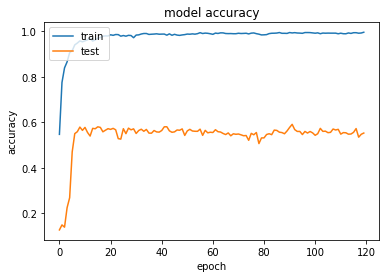

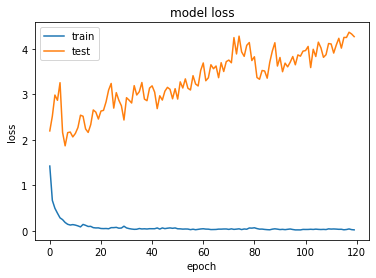

In [13]:
# summarize history for accuracy
plt.plot(model_all.history['accuracy'])
plt.plot(model_all.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_all.history['loss'])
plt.plot(model_all.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.422398,0.547010,2.196688,0.127097
1,0.666012,0.775061,2.522288,0.149067
2,0.493047,0.839298,2.986337,0.139145
3,0.384166,0.865526,2.870819,0.224663
4,0.282127,0.906201,3.258669,0.268604
...,...,...,...,...
115,0.019150,0.993776,4.255481,0.555871
116,0.025293,0.993776,4.254815,0.572407
117,0.038079,0.991554,4.369574,0.534609
118,0.022937,0.992443,4.331582,0.547366


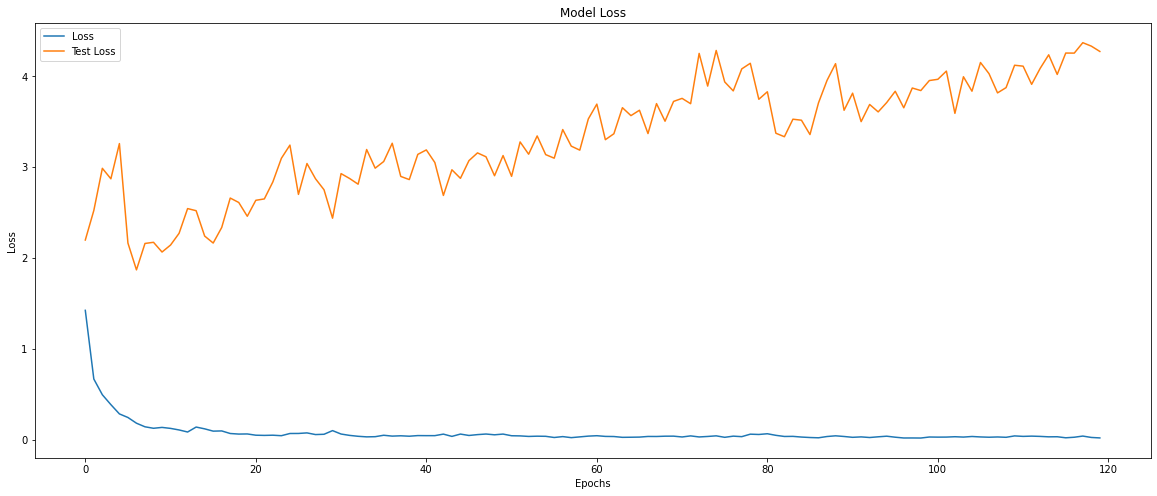

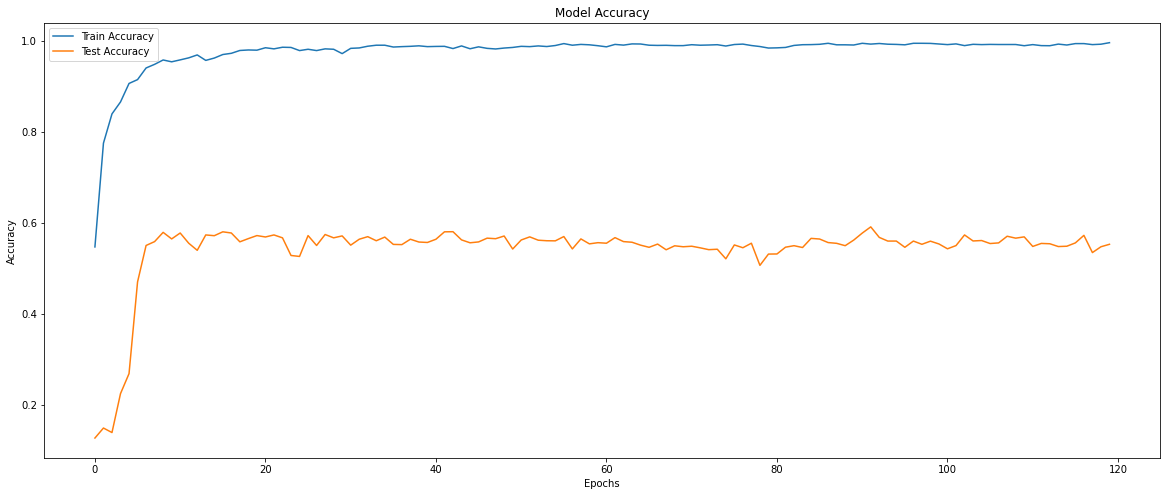

In [15]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [16]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[134   0  74  18  64  72  28  19  47  44]
 [  2 189   6   2   0   3   0   3   2  14]
 [  5  10 315  36   5   9  13   6  59  42]
 [ 19   6  49 344  14   5  12   1  33  17]
 [  4   9  54  50 223   6   6 113   9  26]
 [ 34  13  46  66  40 205   2  13  20  44]
 [  0   2  15  14   3   1 141   0   5   3]
 [ 24   9   6   3 201  15   4 147  17  26]
 [  1   0  20  24  10   3   0   0 312  23]
 [ 14  22  55  25  17   7   2   5  23 330]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.57      0.27      0.36       500
           1       0.73      0.86      0.79       221
           2       0.49      0.63      0.55       500
           3       0.59      0.69      0.64       500
           4       0.39      0.45      0.41       500
           5       0.63      0.42      0.51       483
           6       0.68      0.77      0.72       184
           7       0.48      0.33      0.39       452
           8       0.59      0.